# app.py code

In [1]:
# libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 1
url = 'https://raw.githubusercontent.com/404reese/ML-projects/main/Medical%20Data%20Visualizer/medical_examination.csv'
df = pd.read_csv(url)

In [4]:
# 2
df['overweight'] = df['weight'] / (df['height'] / 100) ** 2
df['overweight'] = df['overweight'].apply(lambda x: 1 if x > 25 else 0)

In [5]:
# 3
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

In [6]:
# 4
def draw_cat_plot():
    # 5
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'], var_name='variable', value_name='value')

    # 6
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'])['value'].count().reset_index(name='total')

    # 7
    df_cat['proportion'] = df_cat['total'] / df_cat.groupby(['cardio', 'variable'])['total'].transform('sum')

    # 8
    fig = plt.figure(figsize=(10, 10))
    sns.catplot(x="variable", y="proportion", hue="value", col="cardio", data=df_cat, kind="bar")

    # 9
    fig.savefig('catplot.png')
    return fig

In [10]:
# 10
def draw_heat_map():
    # 11
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) &
                 (df['weight'] <= df['weight'].quantile(0.975))]

    # 12
    corr = df_heat.corr()

    # 13
    mask = np.triu(corr)

    # 14
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(corr, annot=True, fmt='.1f', mask=mask, vmax=.3, center=0, cmap='coolwarm', square=True)

    # 15
    fig.savefig('heatmap.png')
    return fig

# Main.py Code

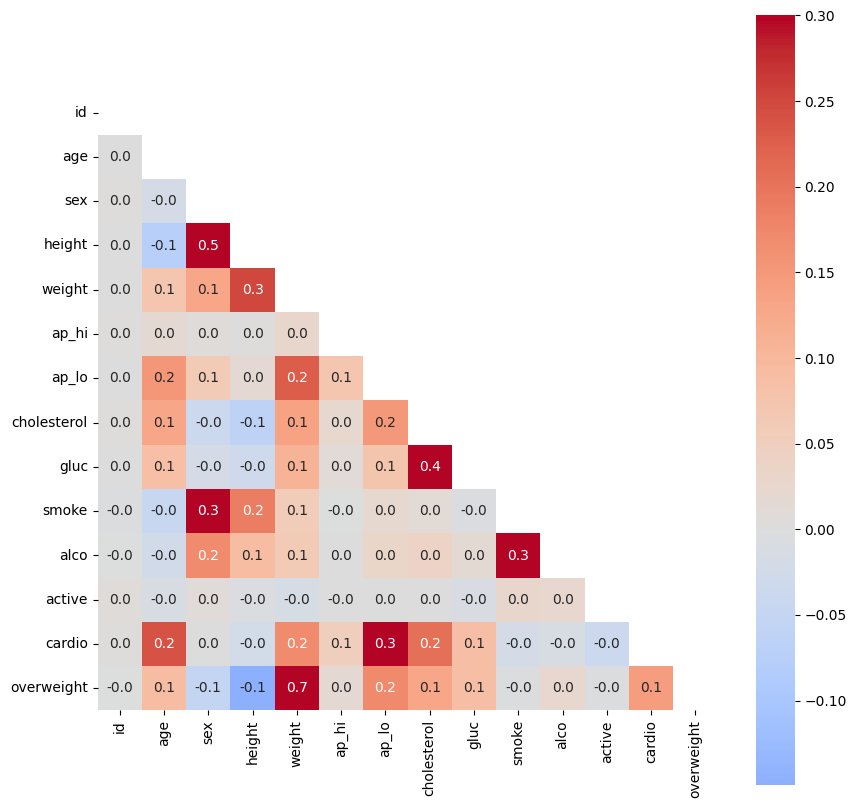

<Figure size 1000x1000 with 0 Axes>

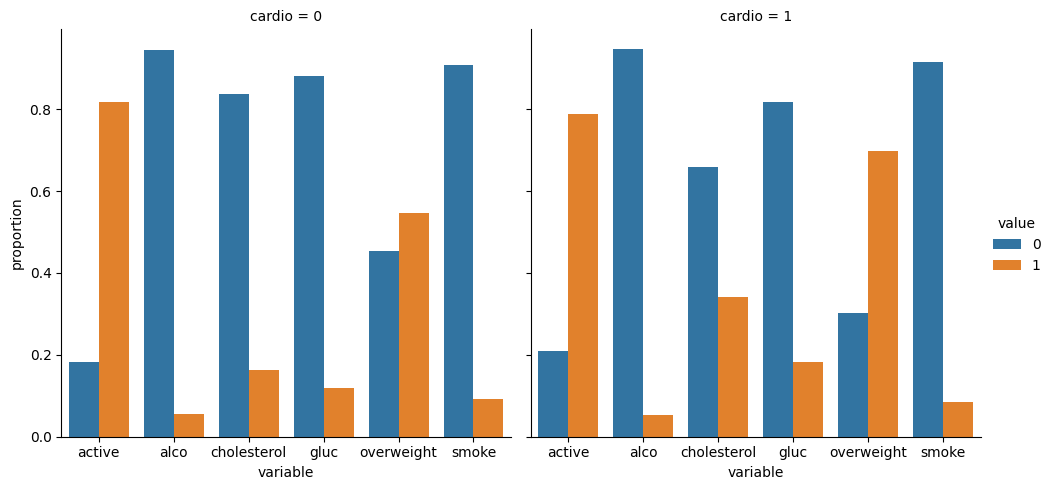

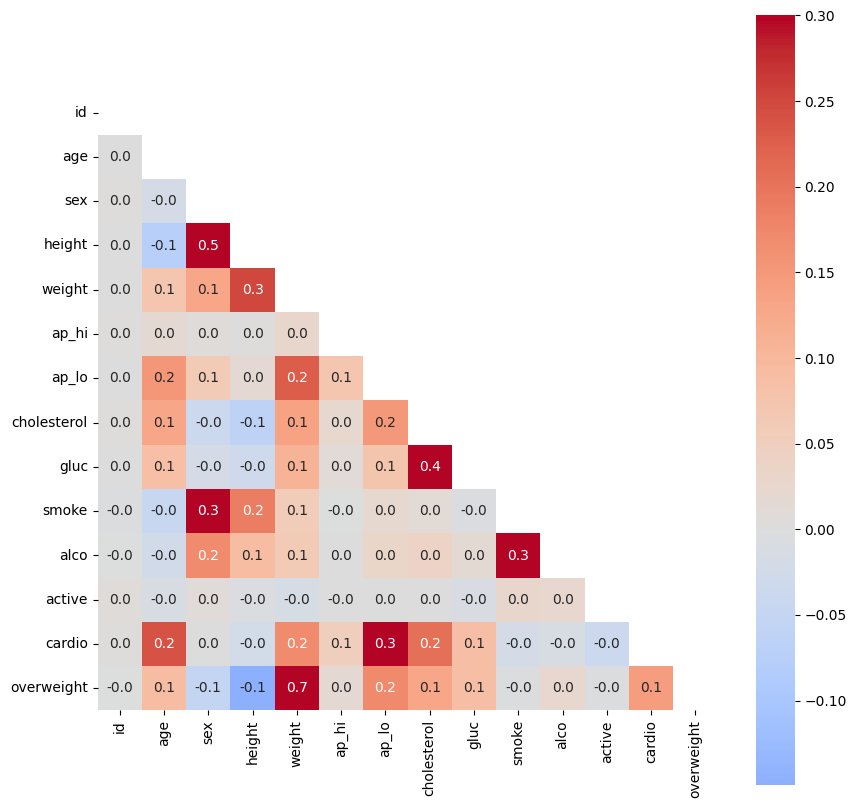

In [11]:
# Call the functions
draw_cat_plot()
draw_heat_map()